<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [15]:
df = pd.read_csv('../data/states_edu.csv')
df.shape

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [16]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Math for 8th grade

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [17]:
df_ = df.set_index('YEAR')
df_.index
#1992 - 2019, 27 different years

Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='YEAR', length=1715)

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [18]:
df_ = df.set_index('STATE')
#df_.head()
print(df_.loc['MICHIGAN']['AVG_MATH_8_SCORE'].mean())
print(df_.loc['OHIO']['AVG_MATH_8_SCORE'].mean())
# Ohio has a higher average outcome score across all years (282.25)

276.1666666666667
282.25


Find the average for your outcome score across all states in 2019

In [19]:
df_ = df.set_index('STATE')
df_['AVG_MATH_8_SCORE'].mean()

278.28073089700996

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [20]:
df['STATE'].unique()
state = df.groupby('STATE')
state['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [21]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Final feature list: Year

Feature selection justification: I want to see if the size of the class affects the 8th grade math scores.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

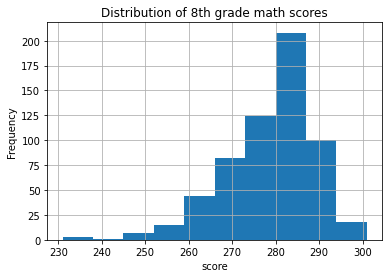

In [43]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

**Visualization 2**

Text(0, 0.5, '8th grade math score')

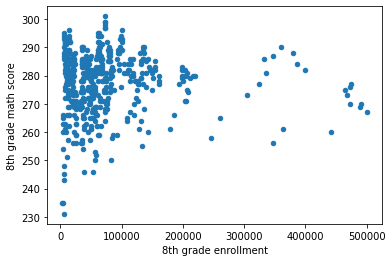

In [47]:
df.plot.scatter(x='ENROLL_8',y='AVG_MATH_8_SCORE')
plt.xlabel('8th grade enrollment')
plt.ylabel('8th grade math score')

8th grade math score with enrollment

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
y = df.loc[X.index]['AVG_MATH_8_SCORE']>260

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: CLASSIFICATION

In [101]:
# import your sklearn class here
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [102]:
# create your model here
# model = LinearRegression()
model = KNeighborsClassifier(n_neighbors=3)

In [103]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

/Users/snidetrain/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


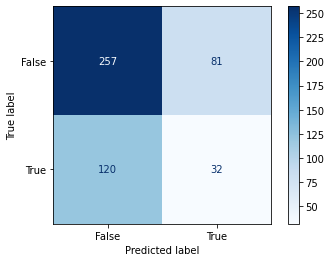

In [104]:
from sklearn.metrics import plot_confusion_matrix

# confusion matrix shows the all results by how they were classified
plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [107]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print(accuracy_score(y_test, model.predict(X_test)))
print(recall_score(y_test, model.predict(X_test)))
print(precision_score(y_test, model.predict(X_test)))


0.5897959183673469
0.21052631578947367
0.2831858407079646


In [92]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Not doing regression


<h2> Summary </h2>

I went for the classification problem. So, I am predicting if 8th graders in some State pass basic level on a math test in a certain year. I think the confusion matrix displays results in a cool way. In my case, the predicted label did very well with getting the true label of false correct. However, the predicted label also just had too many predicted falses. With the true label there was 152 trues and the predicted label only predicted 113 trues. The accuracy score is about 59% which is at least better than a coin toss. The recall score counts true positive out of true positive with false negatives, and the precision score is the number of positive predictions that actually are actually correct. It is no surprise that both of those are very low since we had a lot of false negatives.